In [1]:
import numpy as np
import umbridge
import pandas as pd

model = umbridge.HTTPModel("http://localhost:4243", "forward")

#estimation for the boundaries of each parameter
intervals = [(0,1),
             (0,1),
             (0,1),
             (0,1),
             (0,1),
             (0,1),
             (0,1),
             (0,1),
             (0,1),
             (0,1),
             (0,1),
             (0,1),
             (0,1),
             (0,1)]

#assume normal distribution
N = 100
temp_samples = [np.random.normal(ew, sd, size=N).tolist() for ew,sd in intervals]
observation_matrix = pd.DataFrame({})
for temp in temp_samples:
    observation_matrix = pd.concat([observation_matrix,pd.Series(temp)], axis=1)
observation_matrix = observation_matrix.T #observation matrix with samples in lines 

#Monte Carlo Simulation
mc_values = [model([observation_matrix[i].tolist()])[0][0] for i in range(0,N)]
mc_variance = np.var(mc_values)
mc_estimator = np.mean(mc_values)
print("Monte Carlo Estimator (mean of evaluations):", mc_estimator)
print("Standard deviation of Monte Carlo realisations: ", np.sqrt(mc_variance))
print("Example of an input vector: ", observation_matrix[0].tolist())

Monte Carlo Estimator (mean of evaluations): 0.13110027272430796
Standard deviation of Monte Carlo realisations:  1.5643378541418878
Example of an input vector:  [0.943388448065228, -1.2183258648996091, 0.3703197676584962, 0.6035419046167425, 1.0161975129124756, -0.4269145580394191, -2.1254964550734092, 0.8200640440693617, 1.0110701670022195, -0.11585915351702814, 1.6396284212905619, 0.20489195508663208, 0.879758799919152, 1.1030337415313451]


In [3]:
#preparation of data, observations are in lines 
observation_matrix = observation_matrix.reset_index()
observation_matrix = observation_matrix.drop("index", axis=1)
observation_matrix = observation_matrix.T
observation_matrix[14] = mc_values
observation_matrix.columns = ['X{}'.format(i) for i in range(1, 15)] + ["Y"]


In [5]:
observation_matrix

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,Y
0,0.943388,-1.218326,0.370320,0.603542,1.016198,-0.426915,-2.125496,0.820064,1.011070,-0.115859,1.639628,0.204892,0.879759,1.103034,-0.244464
1,-1.942685,1.078549,0.357074,1.574973,0.660437,0.304315,-0.447280,0.441131,-0.608119,-1.877826,0.202054,-0.188830,0.112910,-1.118115,3.010597
2,0.104106,-0.170856,-1.226846,-0.443916,-0.872486,0.335334,0.693114,0.260974,0.413607,-1.370156,0.601491,0.453644,0.686399,0.114431,-1.841618
3,-0.029099,0.493122,-0.766488,-0.766447,-1.297327,-0.132271,-0.190646,-0.836204,0.614817,-0.264146,0.331881,0.548658,-0.466517,2.268022,-1.039814
4,-0.483753,-0.504883,-1.402821,0.063647,1.223758,-0.402533,-0.810158,-0.982679,-0.504634,-0.588650,-0.103591,-0.515410,-1.672199,0.080830,-1.844056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.040105,-0.267328,-0.659833,-0.521204,0.872683,0.093837,0.553498,0.852676,-0.002391,-1.515574,-0.494311,-0.068235,-1.797242,0.327840,-1.448366
96,-0.158935,1.653224,-1.098588,-0.001741,-0.778467,1.187372,-0.230746,0.266061,1.184482,-0.300260,0.788359,-1.286584,-1.438332,1.299860,0.552895
97,0.044915,1.193951,-0.658242,0.696772,1.489847,0.858465,1.071010,0.411828,-1.953883,0.090217,0.100571,-1.583925,-0.877706,-0.596441,1.232481
98,-0.109249,-0.479949,-0.887458,-0.847397,1.254476,-0.939760,-0.045287,-1.427013,2.057938,1.041033,1.608882,1.048335,-1.218191,0.713688,-2.214803


In [7]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Y ~ ' + ' + '.join(observation_matrix.columns[:13]), data=observation_matrix).fit()
anova_results = sm.stats.anova_lm(model, typ=2)

print(anova_results)

                sum_sq    df             F    PR(>F)
X1        1.273768e-29   1.0  3.860479e+00  0.052665
X2        8.229139e+01   1.0  2.494051e+31  0.000000
X3        1.086876e+02   1.0  3.294056e+31  0.000000
X4        5.730709e+01   1.0  1.736838e+31  0.000000
X5        3.103576e-29   1.0  9.406180e+00  0.002891
X6        6.101191e-29   1.0  1.849122e+01  0.000045
X7        4.895561e-31   1.0  1.483725e-01  0.701047
X8        1.112350e-30   1.0  3.371261e-01  0.563011
X9        5.744425e-30   1.0  1.740995e+00  0.190515
X10       4.801738e-31   1.0  1.455289e-01  0.703786
X11       4.122947e-29   1.0  1.249564e+01  0.000659
X12       3.309454e-30   1.0  1.003015e+00  0.319392
X13       1.456706e-30   1.0  4.414918e-01  0.508181
Residual  2.837577e-28  86.0           NaN       NaN


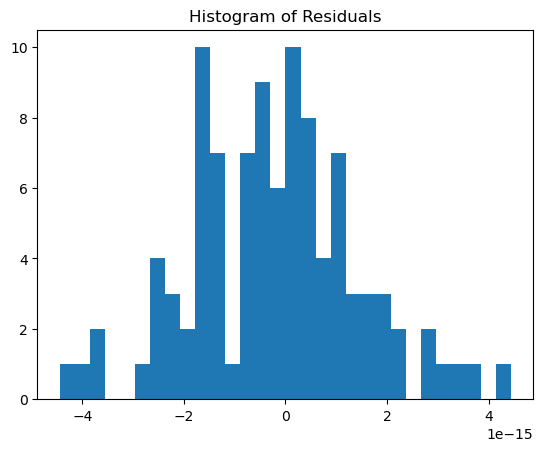

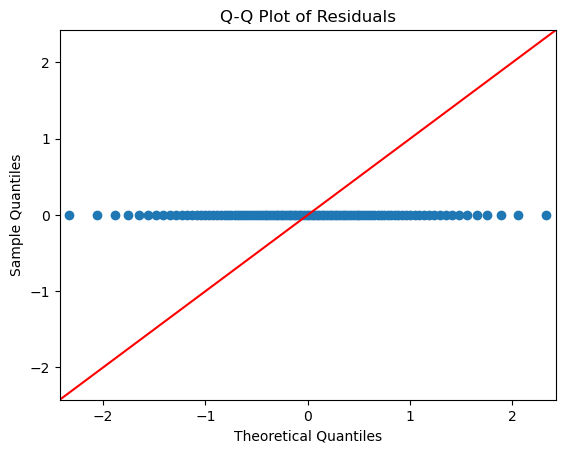

In [9]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Residuen aus dem Modell
residuals = model.resid

# Histogramm der Residuen
plt.hist(residuals, bins=30)
plt.title('Histogram of Residuals')
plt.show()

# Q-Q-Plot
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Separating out the features
x = observation_matrix.loc[:, 'X1':'X14']

# Standardize
x = StandardScaler().fit_transform(x)

# PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)

# PCA Dataframe
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

# PCA Dataframe with Output Y (=Temperature)
finalDf = pd.concat([principalDf, observation_matrix['Y']], axis = 1)
finalDf

,principal component 1,principal component 2,principal component 3,Y
0,0.426553,-0.356914,-0.446519,-0.244464
1,2.128435,-0.668371,-2.345184,3.010597
2,0.240903,-1.167820,1.058688,-1.841618
3,-1.212276,-1.447333,1.251606,-1.039814
4,-0.074689,0.039261,-1.696339,-1.844056
...,...,...,...,...
95,0.344287,0.055320,-0.010638,-1.448366
96,-1.565341,-2.162339,-0.088734,0.552895
97,0.259514,0.061557,-1.791894,1.232481
98,-1.458940,-1.046609,1.060491,-2.214803


In [35]:
pca.explained_variance_ratio_

array([0.11563612, 0.10837012, 0.09731624])

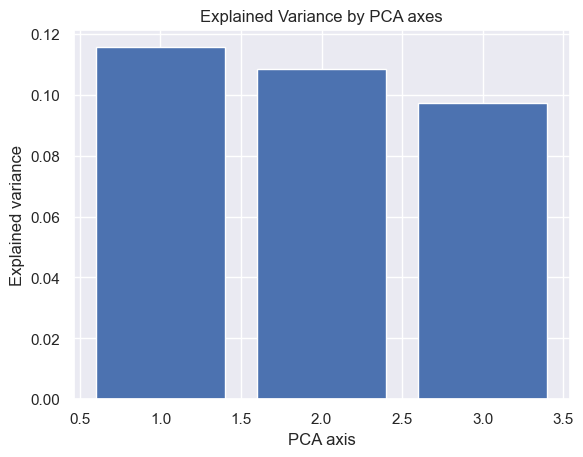

In [37]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
 
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_ratio_)+1),
    pca.explained_variance_ratio_
    )
 
 
plt.xlabel('PCA axis')
plt.ylabel('Explained variance')
plt.title('Explained Variance by PCA axes')
plt.show()

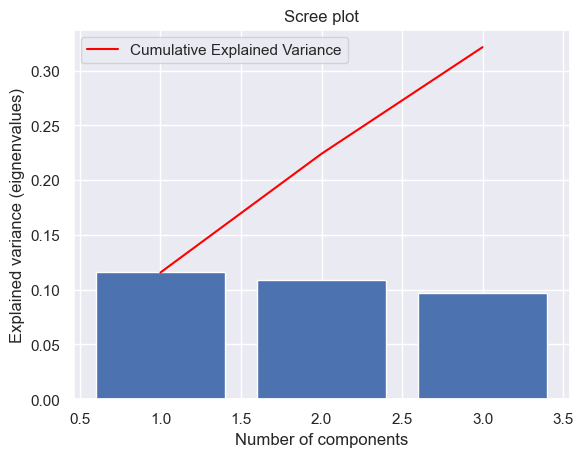

In [39]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
 
# Scree Plot
import numpy as np
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_ratio_)+1),
    pca.explained_variance_ratio_
    )
 
plt.plot(
    range(1,len(pca.explained_variance_ratio_ )+1),
    np.cumsum(pca.explained_variance_ratio_),
    c='red',
    label='Cumulative Explained Variance')
 
plt.legend(loc='upper left')
plt.xlabel('Number of components')
plt.ylabel('Explained variance (eignenvalues)')
plt.title('Scree plot')
 
plt.show()

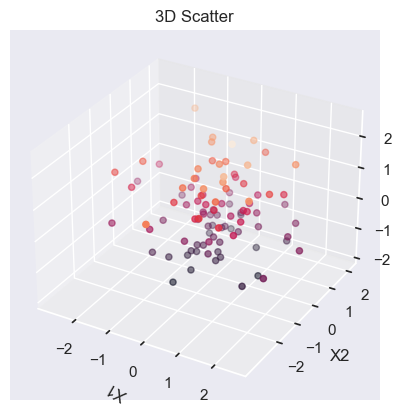

In [45]:
# Prepare 3D graph
fig = plt.figure()
ax = plt.axes(projection='3d')
 
# Plot scaled features
xdata = x[:,0]
ydata = x[:,1]
zdata = x[:,2]
 
# Plot 3D plot
ax.scatter3D(xdata, ydata, zdata, c=zdata)
 
# Plot title of graph
plt.title(f'3D Scatter')
 
# Plot x, y, z even ticks
ticks = np.linspace(-2, 2, num=5)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_zticks(ticks)
 
# Plot x, y, z labels
ax.set_xlabel('X1', rotation=150)
ax.set_ylabel('X2')
ax.set_zlabel('X3', rotation=60)
plt.show()

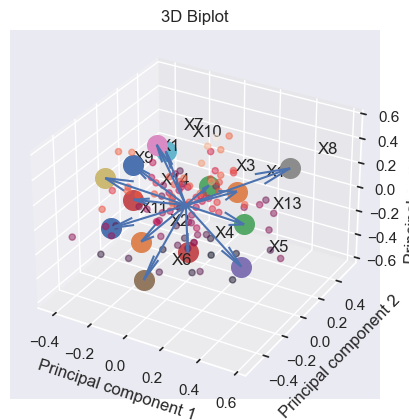

In [53]:
# Create the scaled PCA dataframe
pca_df_scaled = principalDf.copy()

feature_names = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14']

scaler_df = principalDf[['principal component 1', 'principal component 2', 'principal component 3']]
scaler = 1 / (scaler_df.max() - scaler_df.min())
 
for index in scaler.index:
    pca_df_scaled[index] *= scaler[index]
 
# Initialize the 3D graph
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
 
# Define scaled features as arrays
xdata = pca_df_scaled['principal component 1']
ydata = pca_df_scaled['principal component 2']
zdata = pca_df_scaled['principal component 3']
 
# Plot 3D scatterplot of PCA
ax.scatter3D(
    xdata, 
    ydata, 
    zdata, 
    c=zdata, 
    #cmap='Greens', 
    alpha=0.5)
 
# Define the x, y, z variables
loadings = pca.components_
xs = loadings[0]
ys = loadings[1]
zs = loadings[2]
 
# Plot the loadings
for i, varnames in enumerate(feature_names):
    ax.scatter(xs[i], ys[i], zs[i], s=200)
    ax.text(
        xs[i] + 0.1, 
        ys[i] + 0.1, 
        zs[i] + 0.1, 
        varnames)
 
# Plot the arrows
x_arr = np.zeros(len(loadings[0]))
y_arr = z_arr = x_arr
ax.quiver(x_arr, y_arr, z_arr, xs, ys, zs)
 
# Plot title of graph
plt.title(f'3D Biplot')
 
# Plot x, y, z labels
ax.set_xlabel('Principal component 1', rotation=150)
ax.set_ylabel('Principal component 2')
ax.set_zlabel('Principal component 3', rotation=60)
 
plt.show()

In [61]:
x = pd.DataFrame(x)
pca_df_scaled = pd.DataFrame(pca_df_scaled)

pd.concat([pca_df_scaled, x], axis=1).corr().filter(x.columns).filter(pca_df_scaled.columns, axis=0)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
principal component 1,-0.419462,0.064551,-0.002379,-0.110434,0.445065,0.023034,-0.281138,0.553115,-0.341271,-0.311749,-0.294279,0.397795,0.569494,-0.245324
principal component 2,0.065033,-0.641798,0.293741,0.214691,-0.097557,-0.551820,0.129050,0.317309,-0.382382,0.290867,-0.400440,-0.075819,-0.301891,-0.221927
principal component 3,0.184530,0.114308,-0.003962,-0.657682,-0.347374,-0.328984,0.390787,0.357387,0.374764,0.215499,-0.068531,0.332945,0.245317,0.103886
